### **By: Udisha Dutta Chowdhury**
The Sparks Foundation 

 Data Science and Business Analytics Internship

#### Task 1- Prediction using Supervised ML
This is a linear regression task which involves two variables. Here we will predict the percentage of marks that a student is expected to score based on the number of hours they have studied.


#### Data source:  http://bit.ly/w-data



 Problem statement: What will be predicted score if a student studies for 9.25 hrs/ day? 

In [67]:
#Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
#Importing the data
data=pd.read_csv("http://bit.ly/w-data")
data.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [69]:
data.shape

(25, 2)

In [70]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [71]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


### Data Visualization

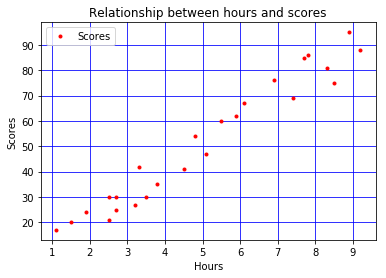

In [72]:
#Plotting the 2D graph to check the relationship between hours and scores
data.plot(x="Hours" , y= "Scores", style ='.' , color='red')
plt.grid(color='b')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Relationship between hours and scores')
plt.show()

 Postive correlation is seen between the no. of hours studied and the percentage of marks scored

### Data Preparation
Defining the independent and target variable.

In [108]:
#Independent variable
X = data.iloc[:, :-1].values  

#Target variable
y = data.iloc[:, 1].values  


In [109]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [110]:
print(Y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


Splitting the data into training and testing set

In [111]:
#Import the required library
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.75,test_size=0.25,random_state=0)


25% of the samples are assigned to the test set.

In [112]:
X_train

array([[7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [113]:
Y_train

array([86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21, 54, 95,
       41], dtype=int64)

In [114]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9],
       [3.8],
       [1.9]])

In [115]:
Y_test

array([20, 27, 69, 30, 62, 35, 24], dtype=int64)

### Training the model

In [116]:
from sklearn.linear_model import LinearRegression
Linear_regressor=LinearRegression()
Linear_regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Plotting the regression line

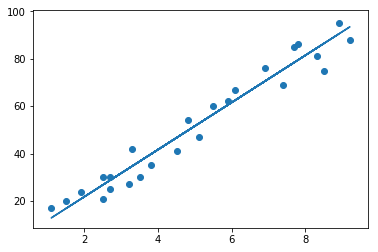

In [120]:
#y=mx+c
regression_line=Linear_regressor.coef_*X + Linear_regressor.intercept_
plt.plot(X,regression_line)
plt.scatter(X,Y)


### Predictions

Prediction refers to the output of an algorithm after it has been trained on the test data set

In [121]:
#Predicting the scores
Y_pred=Linear_regressor.predict(X_test)

In [122]:
A_P=pd.DataFrame({'Actual':Y_test,'Predicted':Y_pred})
A_P


,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


Lets predict the scores for 9.25 hours


In [128]:
print('Predicted score of a student who studies for 9.25 hrs/ day:',Linear_regressor.predict([[9.25]]))

Predicted score of a student who studies for 9.25 hrs/ day: [93.89272889]


### Model Evaluation

Checking the Efficiency of the model

In [129]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(Y_test, Y_pred)) 

Mean Absolute Error: 4.130879918502486
Mean Squared Error: 20.33292367497997
